<a href="https://colab.research.google.com/github/subi-147/TimeSeries_lab/blob/main/TSA_EXP_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-16-0dc5a5d11de3>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return pd.Series(series, index=pd.date_range(start='2023-01-01', periods=n, freq='M'))


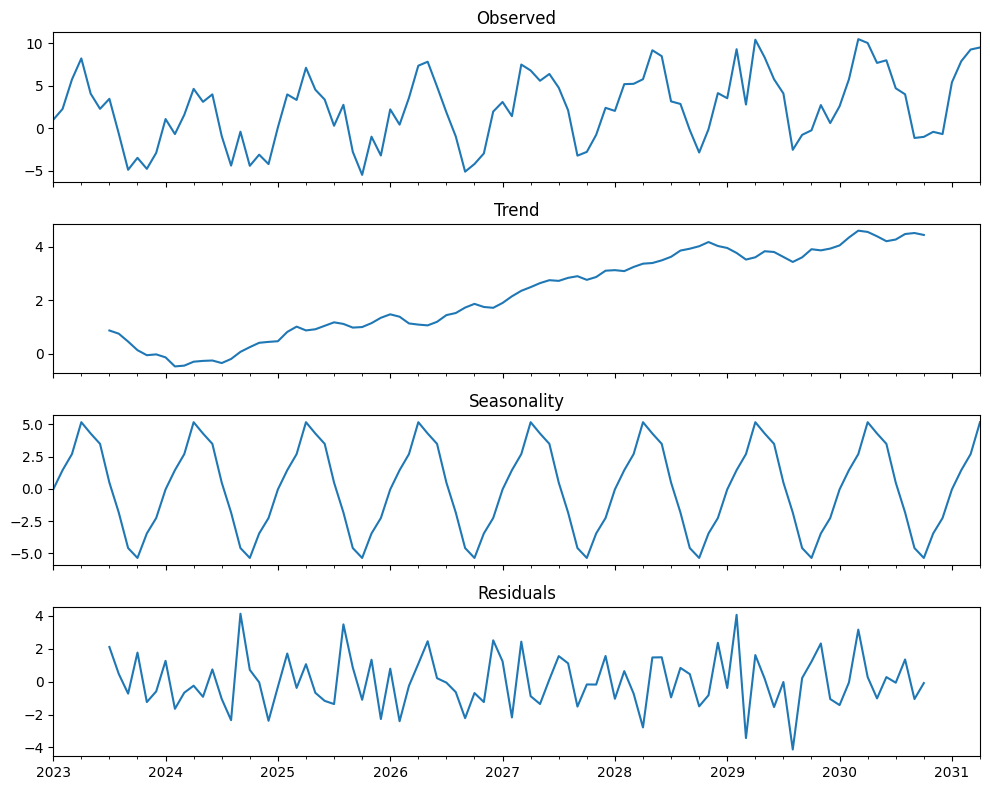

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic time series data
def generate_time_series(n=100, trend_slope=0.05, seasonality_amplitude=5, noise_std=2):
    np.random.seed(42)
    time = np.arange(n)
    trend = trend_slope * time
    seasonality = seasonality_amplitude * np.sin(2 * np.pi * time / 12)
    noise = np.random.normal(scale=noise_std, size=n)
    series = trend + seasonality + noise
    return pd.Series(series, index=pd.date_range(start='2023-01-01', periods=n, freq='M'))

# Decompose time series
def decompose_time_series(series, model='additive'):
    decomposition = seasonal_decompose(series, model=model, period=12)
    return decomposition

# Plot decomposition results
def plot_decomposition(decomposition):
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
    decomposition.observed.plot(ax=axes[0], title='Observed')
    decomposition.trend.plot(ax=axes[1], title='Trend')
    decomposition.seasonal.plot(ax=axes[2], title='Seasonality')
    decomposition.resid.plot(ax=axes[3], title='Residuals')
    plt.tight_layout()
    plt.show()

# Generate data and decompose
series = generate_time_series()
decomposition = decompose_time_series(series)
plot_decomposition(decomposition)
